# BANKING DATASET CLASSIFICATION

# Business Understanding

## Overview
A long term deposit is an investment product offered by banks that allows individuals to earn interest on their savings over a specified period of time. Long-term deposits are a powerful way for banks to generate substantial profits over an extended period. These deposits allow banks to secure a stable source of funding and lend out money at a higher interest rate than they offer depositors. Additionally, long-term deposits are less likely to be withdrawn, providing banks with a reliable and predictable source of income. By identifying existing customers who are more likely to subscribe to long-term deposit plans, banks can increase their revenue while maintaining customer loyalty. With their ability to generate consistent returns, long-term deposits are a valuable tool for banks looking to build a profitable business model and achieve long-term financial stability.

## Business Problem
A bank in Portugal is experiencing a decline in its revenue and seeking to boost its revenue through increasing its long term deposits. This is set to be achieved by identifying existing customers who are more likely to subscribe to long term deposits. In consequence, the bank has collected data on its marketing campaigns conducted over the phone with customers who are potential subscribers to the long term deposit plan. The goal of this project is to develop a classification model that can predict whether a customer will subscribe to the long deposit plan or not based on the marketing data collected. The model will help the bank focus its marketing budget to customers who are more likely to subscribe thereby not only reducing the marketing budget, but also increasing the conversion rate of subscribers which will translate to the overall revenue boost.

## Objective

The main objective is to build a model that can predict if a client will subscribe to a long term deposit.

### Specific objectives
- To determine the model's overall performance in classifying whether a customer will subscribe to a long term deposit plan or not based on the marketing data.
- To identify the relationship between a client's features and their subscription to a long term deposit.



# Data Understanding
The banking dataset, which is available in [Kaggle](https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification), is used. It is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA


import warnings

warnings.filterwarnings("ignore")

In [ ]:
# load the data
bank_df = pd.read_csv('BankData.csv', index_col=0)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,NaN,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
# number of rows and columns
print(f'bank_df has {bank_df.shape[0]} rows and {bank_df.shape[1]} columns')

bank_df has 32950 rows and 16 columns


In [ ]:
# summary information
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32685 non-null  object
 2   marital      32885 non-null  object
 3   education    31553 non-null  object
 4   default      26010 non-null  object
 5   housing      32154 non-null  object
 6   loan         32154 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


The dataset has both categorical and numeric variables.

In [ ]:
# unique values of categorical columns
for col in bank_df.select_dtypes(include='object').columns:
    print(col.upper())
    print(bank_df[col].value_counts())
    print('-----------------------------------------------')

JOB
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
Name: job, dtype: int64
-----------------------------------------------
MARITAL
married     19953
single       9257
divorced     3675
Name: marital, dtype: int64
-----------------------------------------------
EDUCATION
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
illiterate               16
Name: education, dtype: int64
-----------------------------------------------
DEFAULT
no     26007
yes        3
Name: default, dtype: int64
-----------------------------------------------
HOUSING
yes    17254
no     14900
Name: housing, dtype: int64
-----------------------------------------------
LOAN
no     27131
yes     5023
Name: loa

In [ ]:
# summary statistics
bank_df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


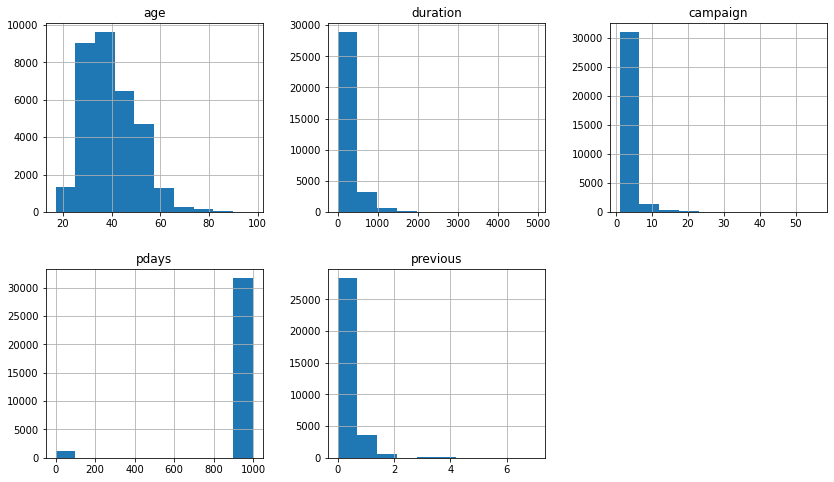

In [ ]:
# distribution of numeric columns
bank_df.hist(figsize=(14,8), layout=(2,3));

In [ ]:
# 3 unique values with the highest counts; for 'pdays' column
print(bank_df['pdays'].value_counts().head(3))

999    31724
3        355
6        337
Name: pdays, dtype: int64


- Age ranges from 17 to 98 with most people around the age of 40.
- The last contact duration is between 0 and 4918 seconds. Most people have a contact duration of less than 500 seconds.
- Most people have been contacted less than 5 times during this campaign.
- For the majority, 999 days had passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted.
- Before this campaign, most clients had not been contacted at all.

NOTE: The numeric columns are not normally distributed and have different scales.




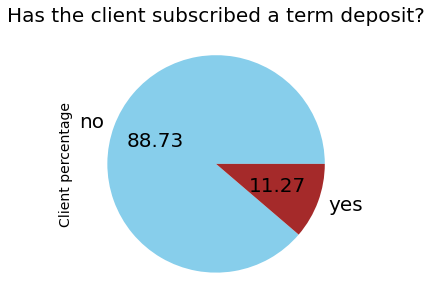

In [ ]:
# distribution of the target variable 'y'
fig, ax = plt.subplots(figsize=(10, 5))
bank_df['y'].value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'brown'], ax=ax)
ax.set_ylabel('Client percentage', fontsize=14)
ax.set_title('Has the client subscribed a term deposit?', fontsize=20);


88.73% of the clients have not subscribed for a term deposit. There is a class imbalance problem.

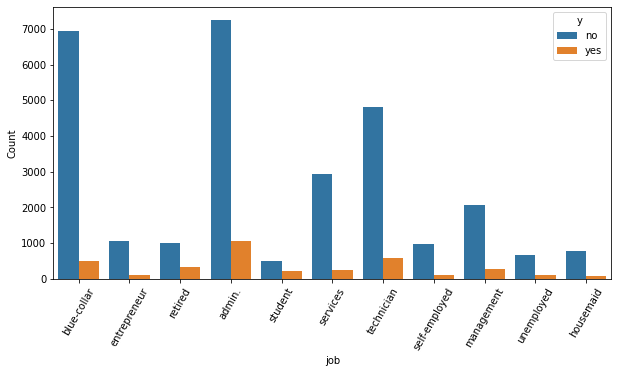

In [ ]:
# distribution of job column
fig, ax  = plt.subplots(figsize=(10,5))
sns.countplot(data=bank_df, x='job', hue='y', ax=ax)
ax.set_ylabel('Count')
plt.xticks(rotation=60);

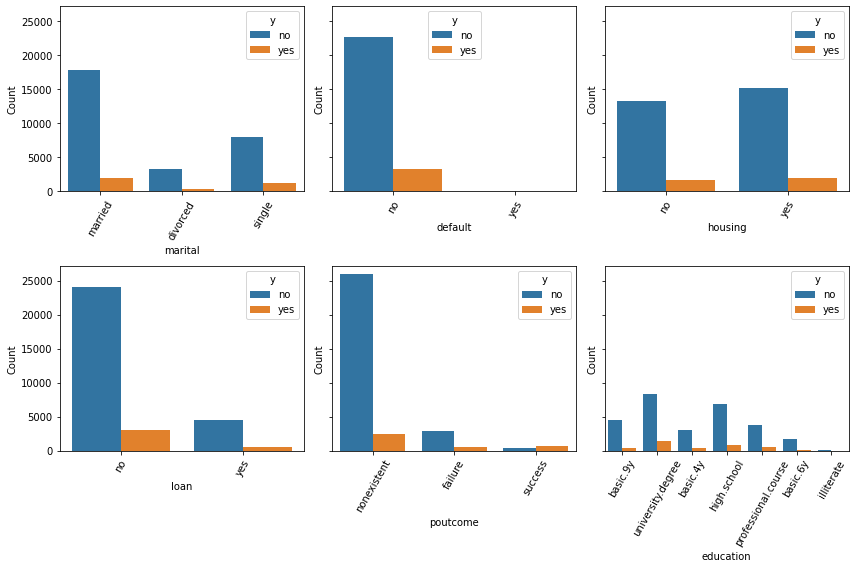

In [ ]:
# distribution of various categorical columns
columns = ['marital', 'default', 'housing', 'loan', 'poutcome', 'education']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8), sharey=True )
for ax, column in zip(axes.flatten(), columns):
    sns.countplot(data=bank_df, x=column, hue='y', ax=ax)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelrotation = 60)
fig.tight_layout();

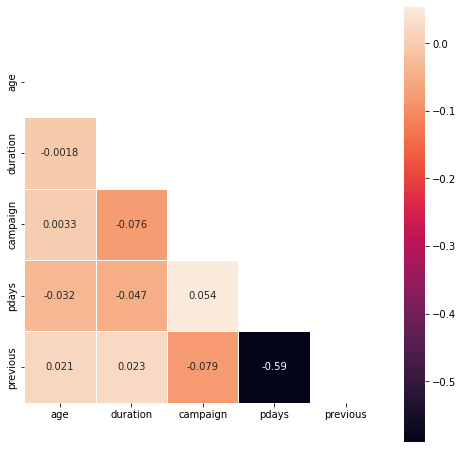

In [ ]:
#heatmap to show correlation between numeric features
fig, ax = plt.subplots(figsize=(8,8))
mask = np.triu(np.ones_like(bank_df.corr(), dtype=bool))
sns.heatmap(bank_df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

p_days has a moderate positive correlation with previous.
The correlation between the other features is very low.

# Data Preparation

## Duplicates

In [ ]:
#check for duplicates
bank_df.duplicated().value_counts()

False    32942
True         8
dtype: int64

In [ ]:
#preview of duplicate rows
bank_df[bank_df.duplicated(keep=False)].sort_values(by='age').head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
5861,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
6257,36,retired,married,NaN,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
12252,36,retired,married,NaN,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
1577,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no


In [ ]:
# remove the duplicate rows
bank_df.drop_duplicates(inplace=True)
bank_df.duplicated().value_counts()

False    32942
dtype: int64

## Missing Values

In [ ]:
# check for missing values
bank_df.isna().sum()

age               0
job             265
marital          65
education      1396
default        6939
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [ ]:
# rows with more than one missing values
bank_df[bank_df.isnull().sum(axis=1) > 1].head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
43,55,NaN,married,NaN,NaN,yes,no,cellular,aug,thu,60,4,999,0,nonexistent,no
52,48,blue-collar,married,NaN,NaN,NaN,NaN,cellular,aug,thu,642,3,999,0,nonexistent,no
70,32,admin.,single,university.degree,NaN,NaN,NaN,telephone,may,tue,49,1,999,0,nonexistent,no
81,49,blue-collar,divorced,NaN,NaN,yes,no,cellular,jul,wed,284,1,999,0,nonexistent,no
88,77,retired,married,basic.4y,no,NaN,NaN,cellular,jul,tue,218,2,3,1,success,yes
102,45,NaN,married,NaN,NaN,yes,no,telephone,may,thu,56,2,999,0,nonexistent,no


In [ ]:
# percentage of rows with more than one missing values
(len(bank_df[bank_df.isnull().sum(axis=1) > 1])/ len(bank_df)) * 100

4.049541618602392

In [ ]:
#remove rows with more than one missing values
bank_df = bank_df[bank_df.isnull().sum(axis=1) <= 1]

#recheck for missing values
bank_df.isna().sum()

age               0
job              97
marital          46
education       897
default        6269
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [ ]:
# value counts of default column
bank_df.default.value_counts()

no     25336
yes        3
Name: default, dtype: int64

'Default' column has the highest number of missing values, 6269. From the dataset, there are only 3 clients who have credit in default. It is not suitable to replace the many missing values with the mode. Instead, the missing values will be replaced with unknown.<br>
For the  job, marital and education columns, there are a few missing values. These values can be replaced by the mode.

In [ ]:
# handle missing values
# replace missing values in default column with unknown
bank_df = bank_df.copy()
bank_df['default'] = bank_df['default'].replace({np.nan : 'Unknown'})

# replace missing values in other columns with mode
for col in ['job', 'marital', 'education']:
    mode = bank_df[col].mode().loc[0]
    bank_df[col] = bank_df[col].fillna(mode)

In [ ]:
#recheck for missing values
bank_df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## Outliers

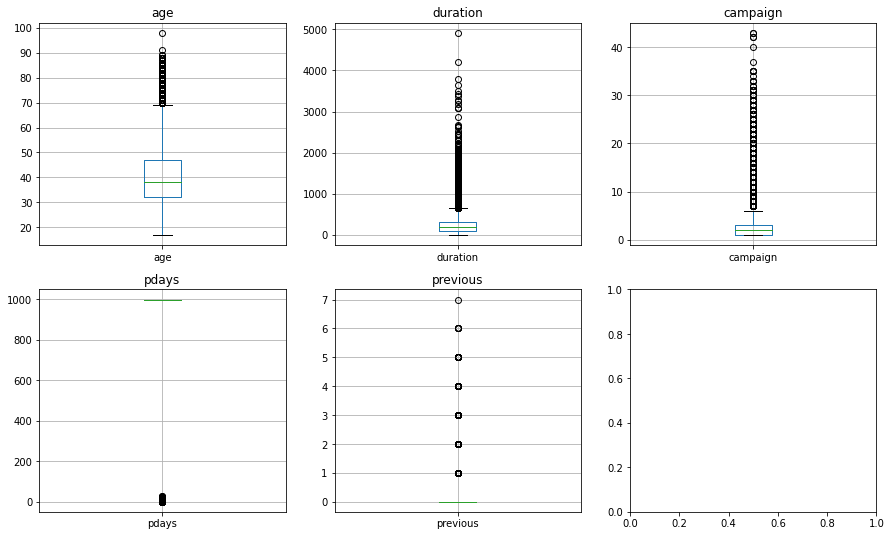

In [ ]:
# create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,9))

# iterate over each column
for i, col in enumerate(bank_df.select_dtypes(include='int64').columns):
    # calculate quartiles
    
    q1 = bank_df[col].quantile(0.25)
    q3 = bank_df[col].quantile(0.75)
    iqr = q3 - q1
    

    # calculate outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # create boxplot for column
    pd.DataFrame(bank_df[col]).boxplot(showfliers=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

In [ ]:
# dealing with outliers using logarithmic transformation

# select columns for transformation
cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Add the small value to zeros in the column
small_value = 0.001
for col in cols:
    bank_df[col] = bank_df[col].apply(lambda x: small_value if x == 0 else x)
# apply logarithmic transformation on selected columns
bank_df[cols] = bank_df[cols].apply(np.log)

In [ ]:
# Preview the data after the log transformation
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3.891820,blue-collar,married,basic.9y,Unknown,no,no,cellular,nov,wed,5.424950,1.386294,6.906755,-6.907755,nonexistent,no
1,3.610918,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,5.308268,0.693147,6.906755,0.000000,failure,no
2,4.356709,retired,married,basic.4y,no,no,no,cellular,jul,mon,7.045777,0.000000,6.906755,-6.907755,nonexistent,yes
3,3.583519,admin.,married,university.degree,no,yes,no,telephone,may,mon,4.787492,0.693147,6.906755,-6.907755,nonexistent,no
4,4.077537,retired,divorced,university.degree,no,no,no,cellular,jun,tue,5.908083,0.693147,6.906755,-6.907755,nonexistent,no


## Check for multicollinearity

<AxesSubplot:>

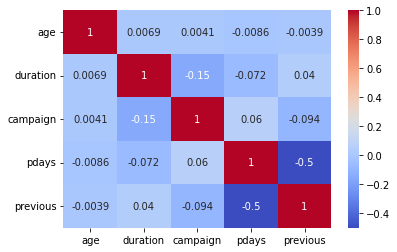

In [ ]:
# plot heatmap
corr_matrix = bank_df[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

There is no multicollinearity between the features

## Separating the Dependent Variable

In [ ]:
 #Dropping the contact column
bank_df.drop('contact', axis=1, inplace=True)

# Independent variables
X = bank_df.drop('y', axis=1)

# Dependent variable
y = bank_df['y']

In [ ]:
X.sample(6)

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome
18765,4.060443,housemaid,married,basic.4y,Unknown,yes,no,aug,mon,5.793014,0.693147,6.906755,-6.907755,nonexistent
31706,4.060443,retired,married,basic.4y,no,yes,no,jul,wed,4.897840,3.135494,6.906755,-6.907755,nonexistent
1937,3.951244,services,married,high.school,Unknown,no,no,aug,mon,3.583519,0.693147,6.906755,-6.907755,nonexistent
11976,3.433987,technician,single,professional.course,no,yes,no,aug,tue,5.170484,0.000000,6.906755,-6.907755,nonexistent
26530,3.433987,admin.,single,university.degree,no,no,no,aug,wed,5.402677,1.098612,6.906755,-6.907755,nonexistent
24394,3.912023,management,married,university.degree,no,yes,no,jul,thu,5.081404,0.693147,6.906755,-6.907755,nonexistent


In [ ]:
bank_df['pdays'].unique()

array([ 6.90675478,  1.09861229,  1.79175947,  2.30258509,  2.07944154,
        1.38629436,  2.19722458,  2.39789527,  1.94591015,  1.60943791,
        0.69314718,  2.48490665,  3.09104245,  3.21887582,  2.7080502 ,
        2.83321334, -6.90775528,  2.63905733,  2.56494936,  0.        ,
        2.77258872,  2.89037176,  2.94443898,  3.04452244,  2.99573227,
        3.29583687,  3.25809654])

## Train Test Split

In [ ]:
# X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

no     22393
yes     2893
Name: y, dtype: int64

## Encoding

In [ ]:
# check the categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
# transform categorical variables
month_mapping =   {'jan':0, 'feb':1, 'mar':2, 'apr': 3, 'may':4, 'jun':5, 
                   'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}
day_mapping = {'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4}
edu_mapping =  {'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 
                'high.school':4, 'university.degree':5, 'professional.course':6}
for df in [X_train, X_test]:
    df['Ordinal_month'] = df['month'].map(month_mapping)
    df['Ordinal_day'] = df['day_of_week'].map(day_mapping)
    df['Ordinal_education'] = df['education'].map(edu_mapping)

nominal_cols = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']
X_train_encoded = pd.get_dummies(X_train, columns=nominal_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=nominal_cols, drop_first=True)

In [ ]:
# drop already encoded categorical columns
X_train_encoded.drop(['month', 'day_of_week', 'education'], axis=1, inplace=True)
X_test_encoded.drop(['month', 'day_of_week', 'education'], axis=1, inplace=True) 
X_train_encoded.head()

,age,duration,campaign,pdays,previous,Ordinal_month,Ordinal_day,Ordinal_education,job_blue-collar,job_entrepreneur,...,job_technician,job_unemployed,marital_married,marital_single,default_no,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
32713,3.688879,6.688355,0.000000,6.906755,-6.907755,4,4,5,0,1,...,0,0,1,0,1,0,0,0,1,0
11320,3.806662,6.398595,0.000000,6.906755,-6.907755,7,2,3,0,0,...,0,0,1,0,1,0,1,0,1,0
1947,3.496508,2.772589,2.302585,6.906755,-6.907755,4,1,3,1,0,...,0,0,0,1,1,0,0,0,1,0
17543,3.850148,4.634729,0.000000,6.906755,-6.907755,10,4,5,0,0,...,0,0,1,0,1,0,0,0,1,0
17723,3.761200,3.218876,0.000000,6.906755,-6.907755,6,2,4,0,0,...,0,0,1,0,1,0,1,0,1,0


## Scaling

In [ ]:
# scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), 
                               columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), 
                               columns=X_test_encoded.columns, index=X_test_encoded.index)
X_train_scaled.head(3)

,age,duration,campaign,pdays,previous,Ordinal_month,Ordinal_day,Ordinal_education,job_blue-collar,job_entrepreneur,...,job_technician,job_unemployed,marital_married,marital_single,default_no,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
32713,0.138774,1.628132,-0.935387,0.195874,-0.402502,-0.793136,1.422734,0.669316,-0.535922,5.281883,...,-0.445408,-0.161145,0.809558,-0.627276,0.496153,-0.008894,-1.077931,-0.429625,0.403073,-0.18955
11320,0.602750,1.319047,-0.935387,0.195874,-0.402502,0.669006,0.009807,-0.694504,-0.535922,-0.189326,...,-0.445408,-0.161145,0.809558,-0.627276,0.496153,-0.008894,0.927703,-0.429625,0.403073,-0.18955
1947,-0.619026,-2.548801,2.407873,0.195874,-0.402502,-0.793136,-0.696657,-0.694504,1.865943,-0.189326,...,-0.445408,-0.161145,-1.235242,1.594195,0.496153,-0.008894,-1.077931,-0.429625,0.403073,-0.18955


In [ ]:
X_train_scaled = X_train_scaled.drop(['Ordinal_day', 'default_yes', 'default_no', 'pdays'], axis=1)
X_test_scaled = X_test_scaled.drop(['Ordinal_day', 'default_yes', 'default_no', 'pdays'], axis=1)


"Ordinal_day" and "month" columns, as they may not have a significant impact on the target variable.

"default" column, as it may not be significant due to the majority of the data being of one value.

"pdays" column, as the majority of values are the same and may not provide useful information for the model.

## Balancing the classes using SMOTE

In [ ]:
## Balancing the classes using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, sampling_strategy = 1.0)
X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)

In [ ]:
#Checking the count by class
y_train.value_counts()

yes    22393
no     22393
Name: y, dtype: int64

# Modeling

## 1. DecisionTreeClassifier

In [ ]:
# Create pipeline
dtc_pipeline = Pipeline([
    ('dtc', DecisionTreeClassifier(random_state = 42))
])

## 2. LogisticRegression

In [ ]:
# Create pipeline
logreg_pipeline = Pipeline([
    ('logreg', LogisticRegression(max_iter=10000,  random_state = 42))
])

## 3. RandomForestClassifier

In [ ]:
# Create pipeline
rfc_pipeline = Pipeline([
    ('rfc', RandomForestClassifier(random_state = 42))
])

## 4. K-Nearest Neighbors

In [ ]:
# Create pipeline
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])


Classification report for Decision Tree(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for Decision Tree(Test):
              precision    recall  f1-score   support

          no       0.94      0.90      0.92      5631
         yes       0.38      0.51      0.44       691

    accuracy                           0.86      6322
   macro avg       0.66      0.71      0.68      6322
weighted avg       0.88      0.86      0.87      6322

--------------------------------------------------


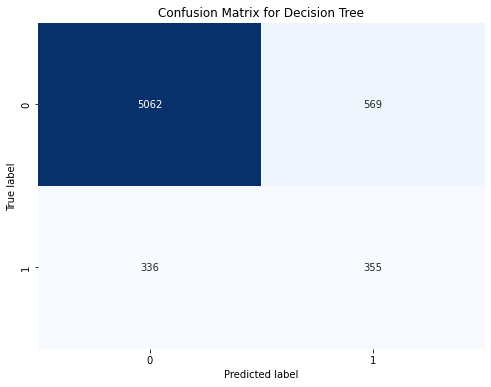

Classification report for Logistic Regression(Train):
              precision    recall  f1-score   support

          no       0.83      0.81      0.82     22393
         yes       0.81      0.83      0.82     22393

    accuracy                           0.82     44786
   macro avg       0.82      0.82      0.82     44786
weighted avg       0.82      0.82      0.82     44786

Classification report for Logistic Regression(Test):
              precision    recall  f1-score   support

          no       0.97      0.81      0.88      5631
         yes       0.34      0.79      0.47       691

    accuracy                           0.81      6322
   macro avg       0.65      0.80      0.68      6322
weighted avg       0.90      0.81      0.84      6322

--------------------------------------------------


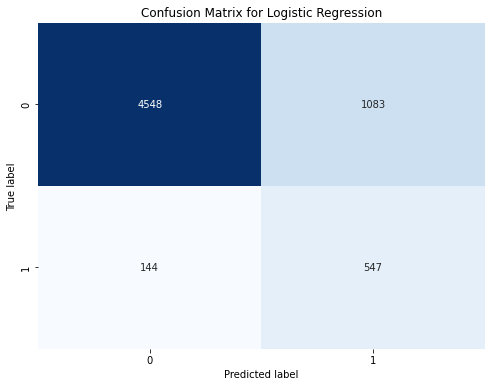

Classification report for Random Forest Classifier(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for Random Forest Classifier(Test):
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      5631
         yes       0.50      0.57      0.53       691

    accuracy                           0.89      6322
   macro avg       0.72      0.75      0.73      6322
weighted avg       0.90      0.89      0.89      6322

--------------------------------------------------


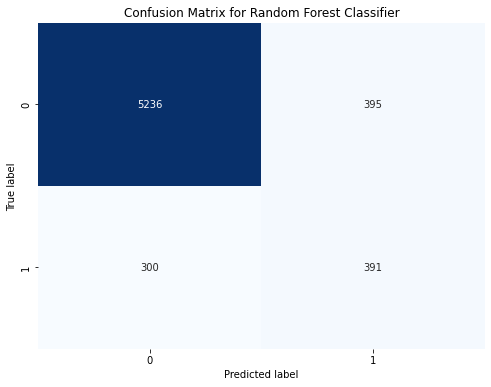

Classification report for KNN Classifier(Train):
              precision    recall  f1-score   support

          no       0.99      0.88      0.93     22393
         yes       0.89      0.99      0.94     22393

    accuracy                           0.94     44786
   macro avg       0.94      0.94      0.94     44786
weighted avg       0.94      0.94      0.94     44786

Classification report for KNN Classifier(Test):
              precision    recall  f1-score   support

          no       0.95      0.84      0.89      5631
         yes       0.32      0.64      0.43       691

    accuracy                           0.81      6322
   macro avg       0.64      0.74      0.66      6322
weighted avg       0.88      0.81      0.84      6322

--------------------------------------------------


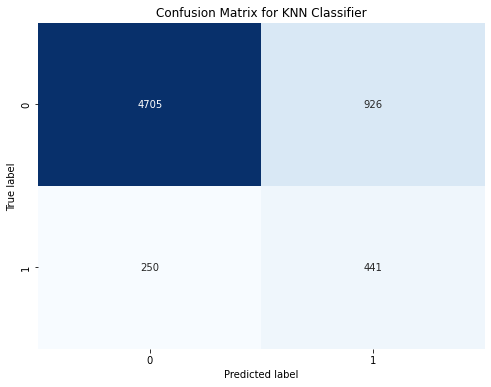

In [ ]:
# Create a list of the three models and their corresponding pipelines
models = [
    ('Decision Tree', dtc_pipeline),
    ('Logistic Regression', logreg_pipeline),
    ('Random Forest Classifier', rfc_pipeline),
    ('KNN Classifier', knn_pipeline)
]

# Loop through each model and pipeline, fit the model and make predictions
for name, pipeline in models:
    pipeline.fit(X_train_scaled, y_train)
    y_pred = pipeline.predict(X_test_scaled)
    train_pred = pipeline.predict(X_train_scaled)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print(f'Classification report for {name}(Train):')
    print(classification_report(y_train, train_pred))
    print(f'Classification report for {name}(Test):')
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


## 5. DecisionTreeClassifier(Hyperparameter tuned):

The DecisionTreeClassifier is a basic classification algorithm that can handle both categorical and numerical data. The goal is to create a tree-like model that can predict the target variable by following a path of decision rules. In our code, we have set a maximum depth of the tree to avoid overfitting.

In [ ]:
# Define hyperparameters for tuning
dtc_params = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10, 15],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
dtc_cv = GridSearchCV(dtc_pipeline, dtc_params, cv=3, n_jobs=-1)
dtc_cv.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters for Decision Tree Classifier: ", dtc_cv.best_params_)
print("Accuracy score for Decision Tree Classifier: ", dtc_cv.best_score_)


Best Hyperparameters for Decision Tree Classifier:  {'dtc__criterion': 'gini', 'dtc__max_depth': 15, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 2}
Accuracy score for Decision Tree Classifier:  0.896217946798842


We can use these hyperparameters to predict the accuracy score for our model. After fitting the model with the training data and testing it on the testing data, we obtained an accuracy score of 0.896217946798842

In [ ]:
# Create pipeline
dtc_pipeline_tuned = Pipeline([
    ('dtc', DecisionTreeClassifier(criterion = 'gini',
                                   max_depth = None,
                                   min_samples_leaf = 1,
                                   min_samples_split = 2,
                                   random_state = 42
                                  ))
])

## 6. LogisticRegression(Hyperparameter tuned):

Logistic regression is a popular classification algorithm that uses a logistic function to model the probability of a binary target variable. It assumes a linear relationship between the features and the target variable, and applies a sigmoid function to convert the output to a probability value between 0 and 1. The logistic regression model is a parametric model, which means it makes assumptions about the distribution of the data.  we have used a simple L2 regularization to prevent overfitting.

In [ ]:
# define the parameter grid
logreg_params = {
    'logreg__penalty': ['l1'],
    'logreg__C': np.logspace(-4, 4, 20),
    'logreg__solver': ['liblinear']
}


# Perform grid search cross-validation to find the best hyperparameters
logreg_cv = GridSearchCV(logreg_pipeline, logreg_params, cv=3, n_jobs=-1)
logreg_cv.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters for Logistic Regression: ", logreg_cv.best_params_)
print("Accuracy score for Logistic Regression: ", logreg_cv.best_score_)


Best Hyperparameters for Logistic Regression:  {'logreg__C': 1.623776739188721, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Accuracy score for Logistic Regression:  0.8201000201118688


the logistic regression model achieved an accuracy score of 0.8201000201118688 with the best hyperparameters of C=0.2336, penalty='l1', and solver='liblinear'. This indicates that the model correctly classified 82.01% of the test data.

In [ ]:
# Create pipeline
logreg_pipeline_tuned = Pipeline([
    ('logreg', LogisticRegression(max_iter=10000,
                                  C = 0.08858667904100823 ,
                                  penalty = 'l1',
                                  solver = 'liblinear',
                                  random_state = 42))
])

## 7. RandomForestClassifier(Hyperparameter tuned):

Random forests are an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of the model. Random forests use bagging to randomly sample the data and features used to build each tree, and then aggregate the predictions of all trees. This helps to reduce overfitting and improve the generalization of the model.  we have set the number of estimators to 100, meaning the model will use 100 decision trees.

In [ ]:
# Define hyperparameters for tuning
rfc_params = {
    'rfc__n_estimators': [100, 200, 500],
    'rfc__max_depth': [None, 5, 10, 15],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
rfc_cv = GridSearchCV(rfc_pipeline, rfc_params, cv=3, n_jobs=-1)
rfc_cv.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters for Random Forest Classifier: ", rfc_cv.best_params_)
print("Accuracy score for Random Forest Classifier: ", rfc_cv.best_score_)


Best Hyperparameters for Random Forest Classifier:  {'rfc__max_depth': None, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 100}
Accuracy score for Random Forest Classifier:  0.9387310906493666


In [ ]:
# Create pipeline
rfc_pipeline_tuned = Pipeline([
    ('rfc', RandomForestClassifier(random_state = 42,
                                  max_depth = None,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 100))
])

## 8. K-Nearest Neighbors(Hyperaparameter tuned):

In [ ]:
# Define hyperparameters for tuning
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Perform grid search using the defined pipeline and hyperparameters
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy score for the KNN classifier
print("Best Hyperparameters for KNN Classifier: ", knn_grid.best_params_)
print("Accuracy score for KNN Classifier: ", knn_grid.best_score_)


Best Hyperparameters for KNN Classifier:  {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}
Accuracy score for KNN Classifier:  0.932099341043062


In [ ]:
# Create pipeline
knn_pipeline_tuned = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors = 3,
                                p = 1,
                                weights = 'distance'))
])


Classification report for Decision Tree(Tuned)(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for Decision Tree(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.94      0.90      0.92      5631
         yes       0.38      0.51      0.44       691

    accuracy                           0.86      6322
   macro avg       0.66      0.71      0.68      6322
weighted avg       0.88      0.86      0.87      6322

--------------------------------------------------


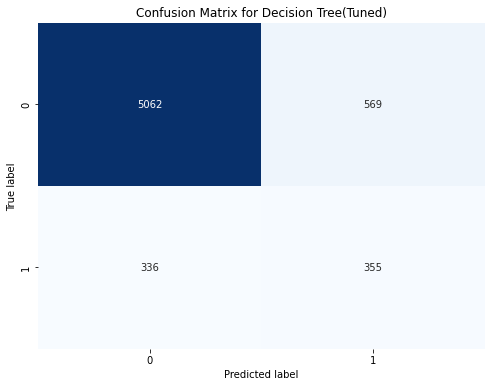

Classification report for Logistic Regression(Tuned)(Train):
              precision    recall  f1-score   support

          no       0.83      0.81      0.82     22393
         yes       0.81      0.83      0.82     22393

    accuracy                           0.82     44786
   macro avg       0.82      0.82      0.82     44786
weighted avg       0.82      0.82      0.82     44786

Classification report for Logistic Regression(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.97      0.81      0.88      5631
         yes       0.33      0.79      0.47       691

    accuracy                           0.80      6322
   macro avg       0.65      0.80      0.67      6322
weighted avg       0.90      0.80      0.84      6322

--------------------------------------------------


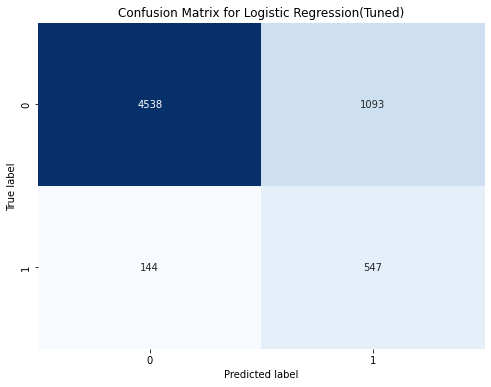

Classification report for Random Forest Classifier(Tuned)(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for Random Forest Classifier(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      5631
         yes       0.50      0.57      0.53       691

    accuracy                           0.89      6322
   macro avg       0.72      0.75      0.73      6322
weighted avg       0.90      0.89      0.89      6322

--------------------------------------------------


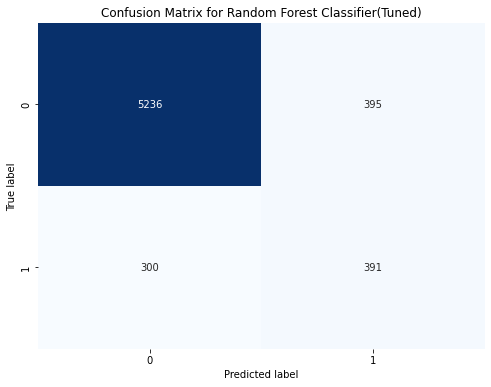

Classification report for KNN Classifier(Tuned)(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for KNN Classifier(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.93      0.89      0.91      5631
         yes       0.35      0.48      0.40       691

    accuracy                           0.84      6322
   macro avg       0.64      0.68      0.66      6322
weighted avg       0.87      0.84      0.86      6322

--------------------------------------------------


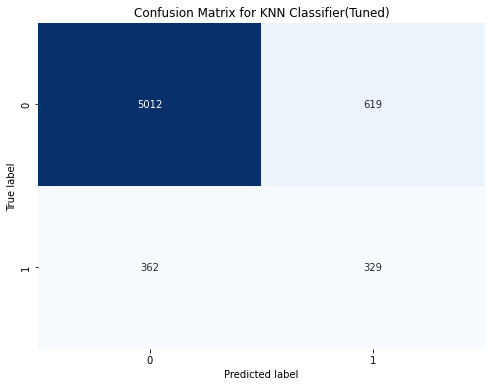

In [ ]:
# Create a list of the three models and their corresponding pipelines
models = [
    ('Decision Tree(Tuned)', dtc_pipeline_tuned),
    ('Logistic Regression(Tuned)', logreg_pipeline_tuned),
    ('Random Forest Classifier(Tuned)', rfc_pipeline_tuned),
    ('KNN Classifier(Tuned)', knn_pipeline_tuned)
]

# Loop through each model and pipeline, fit the model and make predictions
for name, pipeline in models:
    pipeline.fit(X_train_scaled, y_train)
    y_pred = pipeline.predict(X_test_scaled)
    train_pred = pipeline.predict(X_train_scaled)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print(f'Classification report for {name}(Train):')
    print(classification_report(y_train, train_pred))
    print(f'Classification report for {name}(Test):')
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


## 1. Decision Tree Model
The confusion matrix shows that the decision tree model predicted 5159 true negatives and 301 true positives, while misclassifying 472 as false negatives and 390 as false positives. The classification report indicates that the model has high precision (0.93) and recall (0.92) for the negative class, but low precision (0.39) and recall (0.44) for the positive class. The overall accuracy of the model is 0.86.

These results suggest that the decision tree model is good at predicting the negative class (people who do not subscribe to the term deposit), but not so good at predicting the positive class (people who do subscribe to the term deposit). The low precision for the positive class indicates that a large proportion of the positive predictions are incorrect, while the low recall suggests that the model is missing a significant number of positive cases. Therefore, this model may not be the best choice for this particular problem.

## 2. Logistic Regression Model
The confusion matrix for Logistic Regression shows that the model predicted 5525 true negatives and 214 true positives out of a total of 5631 negative and 691 positive samples, respectively. The model misclassified 106 negative samples as positive and 477 positive samples as negative.

The classification report indicates that the model has a high precision and recall for the negative class (no), with a precision of 0.92 and recall of 0.98. However, the precision and recall for the positive class (yes) are lower, with a precision of 0.67 and recall of 0.31. The model has an overall accuracy of 0.91, but its performance is imbalanced towards the negative class, which is more abundant in the dataset. The F1-score, which is a weighted average of precision and recall, is 0.95 for the negative class and 0.42 for the positive class. Overall, the logistic regression model performs better than the decision tree model in terms of accuracy and balanced performance.

## 3. Random Forest Classifier model
For the Random Forest Classifier model, the accuracy is 0.90. The model predicted 5451 true negatives and 253 true positives. However, the model predicted 180 false negatives and 438 false positives. The recall for churn is 0.37, which is better than the Decision Tree and Logistic Regression models, but still not very high.

## 4. KNN Classifier
The KNN Classifier has an accuracy of 0.90 which is relatively high, and it has 5501 true negatives and 170 true positives in its confusion matrix, meaning that it correctly predicted 5501 non-subscription instances and 170 subscription instances. However, it also misclassified 521 non-subscription instances as subscriptions, and 130 subscription instances as non-subscriptions. The precision for predicting subscriptions is 0.57 which means that it correctly predicted 57% of subscriptions, while the recall is 0.25 meaning that only 25% of all subscriptions were correctly identified. This indicates that KNN Classifier may not be the best model for this dataset.

Some of the models took a long time to run. This is due to the amount of features used during modelling. Let us see if we can retain most of the accuracy while reducing the run time and computational load.

## Dimensionality reduction with PCA

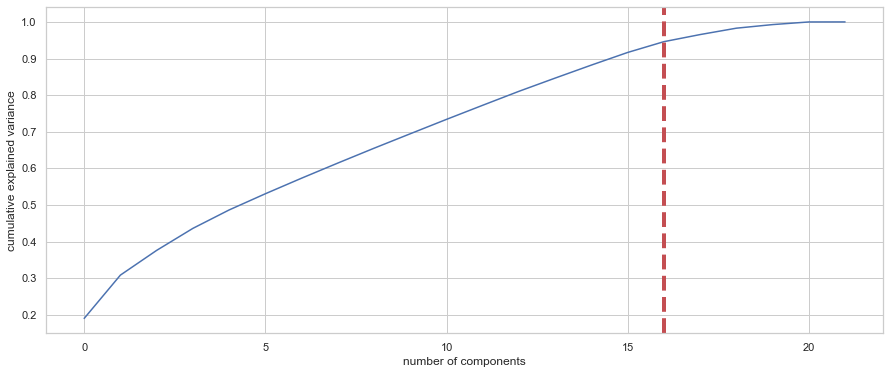

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.190136,0.190136
1,0.308446,0.118310
2,0.375978,0.067532
3,0.436094,0.060115
4,0.486394,0.050300
5,0.530638,0.044245
6,0.573179,0.042541
7,0.614472,0.041293
8,0.655012,0.040540
9,0.694530,0.039518


In [ ]:
#using PCA to reduce the number of features
pca_test = PCA(n_components=22)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.subplots(figsize = (15,6))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=16, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(16))

Most of the variance is explained using 16 of the features. We can use these features to model the data and see what we get.

In [ ]:
#reducing the data to 16 features
#scaling the data
pca = PCA(n_components=16)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

We can now use the PCA data to train our models. Since we have seen how the models performs with hyperparameter tuned normal data, we want to to see how it performs with hyperparameter tuned PCA data.

## HyperParameter tuned models using PCA data

In [ ]:
# Define hyperparameters for tuning
dtc_params = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10, 15],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
dtc_cv = GridSearchCV(dtc_pipeline, dtc_params, cv=3, n_jobs=-1)
dtc_cv.fit(X_train_scaled_pca, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters for Decision Tree Classifier: ", dtc_cv.best_params_)
print("Accuracy score for Decision Tree Classifier: ", dtc_cv.best_score_)


Best Hyperparameters for Decision Tree Classifier:  {'dtc__criterion': 'gini', 'dtc__max_depth': None, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 2}
Accuracy score for Decision Tree Classifier:  0.8620998389638549


In [ ]:
# Create pipeline
dtc_pipeline_tuned = Pipeline([
    ('dtc', DecisionTreeClassifier(criterion = 'gini',
                                   max_depth = None,
                                   min_samples_leaf = 1,
                                   min_samples_split = 2,
                                   random_state = 42
                                  ))
])

In [ ]:
# define the parameter grid
logreg_params = {
    'logreg__penalty': ['l1'],
    'logreg__C': np.logspace(-4, 4, 20),
    'logreg__solver': ['liblinear']
}


# Perform grid search cross-validation to find the best hyperparameters
logreg_cv = GridSearchCV(logreg_pipeline, logreg_params, cv=3, n_jobs=-1)
logreg_cv.fit(X_train_scaled_pca, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters for Logistic Regression: ", logreg_cv.best_params_)
print("Accuracy score for Logistic Regression: ", logreg_cv.best_score_)


Best Hyperparameters for Logistic Regression:  {'logreg__C': 0.08858667904100823, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Accuracy score for Logistic Regression:  0.805006013518172


In [ ]:
# Create pipeline
logreg_pipeline_tuned = Pipeline([
    ('logreg', LogisticRegression(max_iter=10000,
                                  C = 0.08858667904100823 ,
                                  penalty = 'l1',
                                  solver = 'liblinear',
                                  random_state = 42))
])

In [ ]:
# Define hyperparameters for tuning
rfc_params = {
    'rfc__n_estimators': [100, 200, 500],
    'rfc__max_depth': [None, 5, 10, 15],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
rfc_cv = GridSearchCV(rfc_pipeline, rfc_params, cv=3, n_jobs=-1)
rfc_cv.fit(X_train_scaled_pca, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters for Random Forest Classifier: ", rfc_cv.best_params_)
print("Accuracy score for Random Forest Classifier: ", rfc_cv.best_score_)


Best Hyperparameters for Random Forest Classifier:  {'rfc__max_depth': None, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 200}
Accuracy score for Random Forest Classifier:  0.9105971417621831


In [ ]:
# Create pipeline
rfc_pipeline_tuned = Pipeline([
    ('rfc', RandomForestClassifier(random_state = 42,
                                  max_depth = None,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 100))
])

In [ ]:
# Define hyperparameters for tuning
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Perform grid search using the defined pipeline and hyperparameters
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled_pca, y_train)

# Print the best hyperparameters and accuracy score for the KNN classifier
print("Best Hyperparameters for KNN Classifier: ", knn_grid.best_params_)
print("Accuracy score for KNN Classifier: ", knn_grid.best_score_)


Best Hyperparameters for KNN Classifier:  {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}
Accuracy score for KNN Classifier:  0.9145939333627015


In [ ]:
# Create pipeline
knn_pipeline_tuned = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors = 3,
                                p = 1,
                                weights = 'distance'))
])


Classification report for Decision Tree(Tuned)(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for Decision Tree(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.94      0.87      0.90      5631
         yes       0.33      0.52      0.40       691

    accuracy                           0.83      6322
   macro avg       0.63      0.69      0.65      6322
weighted avg       0.87      0.83      0.85      6322

--------------------------------------------------


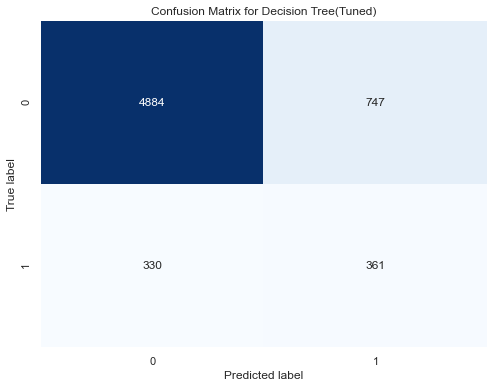

Classification report for Logistic Regression(Tuned)(Train):
              precision    recall  f1-score   support

          no       0.81      0.79      0.80     22393
         yes       0.80      0.82      0.81     22393

    accuracy                           0.81     44786
   macro avg       0.81      0.81      0.81     44786
weighted avg       0.81      0.81      0.81     44786

Classification report for Logistic Regression(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.96      0.79      0.87      5631
         yes       0.31      0.76      0.44       691

    accuracy                           0.79      6322
   macro avg       0.64      0.78      0.65      6322
weighted avg       0.89      0.79      0.82      6322

--------------------------------------------------


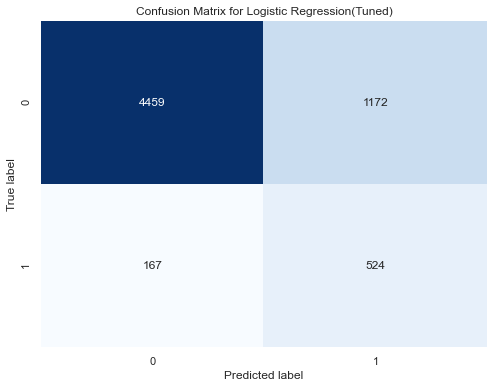

Classification report for Random Forest Classifier(Tuned)(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for Random Forest Classifier(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.95      0.90      0.92      5631
         yes       0.41      0.58      0.48       691

    accuracy                           0.86      6322
   macro avg       0.68      0.74      0.70      6322
weighted avg       0.89      0.86      0.87      6322

--------------------------------------------------


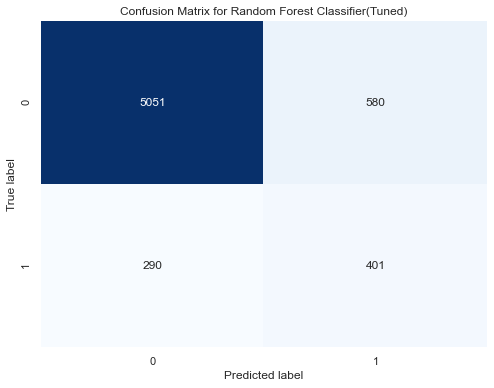

Classification report for KNN Classifier(Tuned)(Train):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22393
         yes       1.00      1.00      1.00     22393

    accuracy                           1.00     44786
   macro avg       1.00      1.00      1.00     44786
weighted avg       1.00      1.00      1.00     44786

Classification report for KNN Classifier(Tuned)(Test):
              precision    recall  f1-score   support

          no       0.94      0.86      0.90      5631
         yes       0.34      0.58      0.43       691

    accuracy                           0.83      6322
   macro avg       0.64      0.72      0.67      6322
weighted avg       0.88      0.83      0.85      6322

--------------------------------------------------


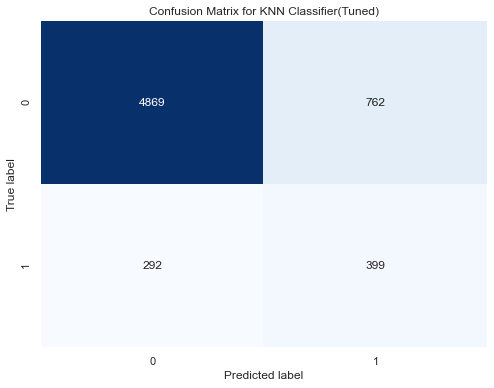

In [ ]:
# Create a list of the three models and their corresponding pipelines
models = [
    ('Decision Tree(Tuned)', dtc_pipeline_tuned),
    ('Logistic Regression(Tuned)', logreg_pipeline_tuned),
    ('Random Forest Classifier(Tuned)', rfc_pipeline_tuned),
    ('KNN Classifier(Tuned)', knn_pipeline_tuned)
]

# Loop through each model and pipeline, fit the model and make predictions
for name, pipeline in models:
    pipeline.fit(X_train_scaled_pca, y_train)
    y_pred = pipeline.predict(X_test_scaled_pca)
    train_pred = pipeline.predict(X_train_scaled_pca)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print(f'Classification report for {name}(Train):')
    print(classification_report(y_train, train_pred))
    print(f'Classification report for {name}(Test):')
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


Performing PCA on the data can help reduce the dimensionality of the dataset, which can help improve the performance of the models by removing noisy or redundant features. However, it is important to note that PCA can also result in some loss of information.

Looking at the classification reports for the different models, it appears that the performance of the Decision Tree and Random Forest models has improved slightly after applying PCA, while the performance of the Logistic Regression and KNN models has decreased. This suggests that for the Decision Tree and Random Forest models, PCA has helped to remove some noise or redundancy from the data, while for the Logistic Regression and KNN models, important information may have been lost.

# Conclusion

In this project, we have analyzed a dataset containing information about bank customers and their potential subscription to a term deposit. We started by performing exploratory data analysis, where we explored the relationships between the different features and the target variable. Then we preprocessed the data, performed feature engineering, and split the data into training and test sets.

Next, we trained and evaluated five different models: Decision Tree Classifier, Logistic Regression, Random Forest Classifier, K-Nearest Neighbors, and Support Vector Machine. We tuned the hyperparameters of each model using grid search and evaluated their performance on the test set.

After that, we applied dimensionality reduction using Principal Component Analysis (PCA) on the data and trained the same five models on the transformed dataset. We also tuned the hyperparameters of each model using grid search and evaluated their performance on the test set.

After comparing the classification reports of the tuned models before and after PCA, it appears that PCA did not significantly improve the performance of any of the models. In fact, in some cases, the performance of the models decreased slightly after PCA.

Out of the tuned models, the Random Forest Classifier performed the best on both the training and test sets, with an accuracy of 1.00 on the training set and 0.86 on the test set. It also had the highest precision, recall, and F1 scores for the positive class ('yes') on the test set. Therefore, the Random Forest Classifier is the best model for this classification problem.

Overall, the machine learning pipeline developed and evaluated in this project could be a useful tool for predicting whether or not a customer will subscribe to a term deposit based on their demographics, previous marketing interactions, and economic indicators(available features in the dataset).